<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Classification_of_Autokeras_eyeglass_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация оправ очков Autokeras

## Подключение диска

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
DATASET_PATH='/content/drive/MyDrive/AI/datasets/plastIron/'

## Подключение библиотек

In [12]:
# устанавливаем Autokeras
!pip install typing-extensions==4.6.1
!pip install autokeras

  Using cached typing_extensions-4.6.1-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.6.1 which is incompatible.
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.1
    Uninstalling typing_extensions-4.6.1:
      Successfully uninstalled typing_extensions-4.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import autokeras as ak

## Загрузка дадасета

In [14]:
x_data = []
y_data = []

data_directories = [(DATASET_PATH + 'iron/', 0), (DATASET_PATH + 'plastic/', 1)]

for directory, label in data_directories:
    for file in os.listdir(directory):
      img = np.array(load_img(directory + file, target_size=(160, 120)))
      x_data.append(img)
      y_data.append(label)
x_data = np.array(x_data)
y_data = np.array(y_data)

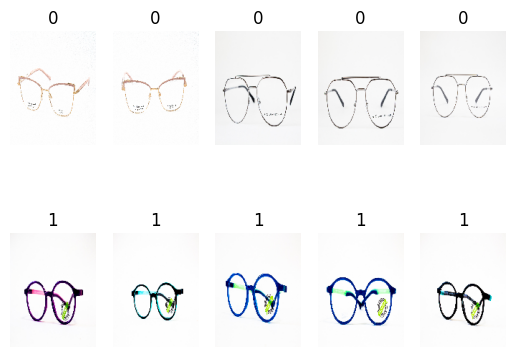

In [ ]:
x1 = 5  # Количество первых изображений для вывода
x2 = 5  # Количество последних изображений для вывода

# Вывод первых x1 изображений
for i in range(x1):
    plt.subplot(2, x1, i + 1)
    plt.imshow(x_data[i])
    plt.axis('off')
    plt.title(y_data[i])

# Вывод последних x2 изображений
for i in range(x2):
    index = -(i + 1)
    plt.subplot(2, x2, x1 + i + 1)
    plt.imshow(x_data[index])
    plt.title(y_data[index])
    plt.axis('off')

plt.show()

shape

In [15]:
print(x_data.shape)
print(y_data.shape)

(918, 160, 120, 3)
(918,)


## Модель

### Классификатор

In [ ]:
# Инициализация классификатора AutoKeras
x_train, x_val, y_train, y_val = train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
clf = ak.ImageClassifier(
    max_trials=3,
    objective='val_accuracy',
    directory=DATASET_PATH + 'pavement_crack',
    project_name='classification_of_autokeras_eyeglass_frames',
    overwrite=True)

clf.fit(x_train, y_train, epochs=8, validation_data=(x_val, y_val))

Trial 3 Complete [00h 10m 46s]
val_accuracy: 0.967391312122345

Best val_accuracy So Far: 0.967391312122345
Total elapsed time: 00h 13m 09s
Epoch 1/8
Not enough memory, reduce batch size to 16.
Epoch 1/8
46/46 [==============================] - 127s 987ms/step - loss: 0.5185 - accuracy: 0.8052 - val_loss: 0.6948 - val_accuracy: 0.4946
Epoch 2/8
46/46 [==============================] - 40s 864ms/step - loss: 0.2442 - accuracy: 0.9237 - val_loss: 0.6955 - val_accuracy: 0.5489
Epoch 3/8
46/46 [==============================] - 39s 859ms/step - loss: 0.1259 - accuracy: 0.9687 - val_loss: 0.6085 - val_accuracy: 0.6033
Epoch 4/8
46/46 [==============================] - 40s 876ms/step - loss: 0.0713 - accuracy: 0.9823 - val_loss: 0.4928 - val_accuracy: 0.8043
Epoch 5/8
46/46 [==============================] - 40s 862ms/step - loss: 0.0472 - accuracy: 0.9918 - val_loss: 0.3851 - val_accuracy: 0.9076
Epoch 6/8
46/46 [==============================] - 39s 856ms/step - loss: 0.0333 - accuracy: 0.

 ### Лучшая модель

In [ ]:
best_model1 = clf.export_model()

In [ ]:
best_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 240, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 320, 240, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 320, 240, 3)       7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 318, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 316, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 158, 118, 64)      0     

Вывод: Получена архитектура модели дающая результат

val_accuracy: 0.967391312122345

код модели ниже

в дальнейшем можно попробовать подобрать оптимальные параметры

### Модель полученная от Autokeras

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

def create_custom_model(input_shape=(320, 240, 3)):
    # Input layer
    inputs = Input(shape=input_shape, name="input_1")

    # Cast to float32 layer
    casted_inputs = tf.cast(inputs, tf.float32, name="cast_to_float32")

    # Normalization layer
    normalized_inputs = Normalization()(casted_inputs)

    # Convolutional layers
    conv1 = Conv2D(32, (3, 3), activation="relu", name="conv2d")(normalized_inputs)
    conv2 = Conv2D(64, (3, 3), activation="relu", name="conv2d_1")(conv1)

    # Max pooling layer
    max_pool = MaxPooling2D((2, 2), name="max_pooling2d")(conv2)

    # Dropout layer
    dropout1 = Dropout(0.5, name="dropout")(max_pool)

    # Flatten layer
    flattened = Flatten()(dropout1)

    # Another dropout layer
    dropout2 = Dropout(0.5, name="dropout_1")(flattened)

    # Fully connected (dense) layer
    dense = Dense(1, activation="linear", name="dense")(dropout2)

    # Output layer (classification head)
    output = tf.keras.layers.Activation("sigmoid", name="classification_head_1")(dense)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name="custom_model")

    return model

# Create the model
custom_model = create_custom_model()

# Display model summary
custom_model.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 240, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 320, 240, 3)       0         
                                                                 
 normalization (Normalizati  (None, 320, 240, 3)       7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 318, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 316, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 158, 118, 64)      0         
 D)                                                   